# Monte-Carlo 학습

예제
* 환경(Environment) : 에이전트의 액션을 받아 상태변이를 일으키고, 보상을 줌 
    - 환경에 특별한 확률적 요소는 없음
    - 각 스텝마다 보상은 -1로 고정
* 에이전트(Agent) : 4방향 랜덤 정책을 이용해 움직임 
* 경험 쌓는 부분(1 Episode) : 에이전트가 환경과 상호작용하며 데이터를 축적 
* 학습하는 부분(Update) : 쌓인 경험을 통해 테이블을 업데이트

## Setting

### Library

In [113]:
import random

In [116]:
from utils.function_time import logging_time
from utils.visualization import value_visualize

## Environment

In [117]:
class GridWorld():
    def __init__(self): # 초기 위치 선정
        self.x=0
        self.y=0
    
    def step(self, a): # 핵심 함수 - 액션에 따른 상태 변이, 보상 정의, 종결 여부 판단
        # 4가지 action - 상하좌우
        if a==0:
            self.move_left()
        elif a==1:
            self.move_up()
        elif a==2:
            self.move_right()
        elif a==3:
            self.move_down()

        reward = -1 # 보상은 항상 -1
        done = self.is_done()
        return (self.x, self.y), reward, done

    def move_right(self): # Action에 따른 이동
        self.y += 1  
        if self.y > 3:
            self.y = 3
      
    def move_left(self): # Action에 따른 이동
        self.y -= 1
        if self.y < 0:
            self.y = 0
      
    def move_up(self): # Action에 따른 이동
        self.x -= 1
        if self.x < 0:
            self.x = 0
  
    def move_down(self): # Action에 따른 이동
        self.x += 1
        if self.x > 3:
            self.x = 3

    def is_done(self): # 에피소드가 끝났는지 판단
        if self.x == 3 and self.y == 3:
            return True
        else :
            return False

    def get_state(self): # 현재 위치 반환
        return (self.x, self.y)
      
    def reset(self): # 처음 상태로 되돌리기
        self.x = 0
        self.y = 0
        return (self.x, self.y)

## Agent

In [118]:
class Agent():
    def __init__(self):
        pass

    def select_action(self): # 랜덤하게 액션을 선택하는 정책
        coin = random.random()

        # uniform 확률 분포의 형태
        if coin < 0.25:
            action = 0
        elif coin < 0.5:
            action = 1
        elif coin < 0.75:
            action = 2
        else:
            action = 3
        return action

## 학습

In [125]:
@logging_time
def monte_carlo(episode):
    env = GridWorld()
    agent = Agent()
    data = [[0] * 4 for _ in range(4)] # 4x4 크기의 0으로 채워진 2차원 리스트 생성 = 테이블이며 value 값 저장
    gamma = 1.0 # 할인율이 1이므로 리턴값은 도착할 때까지의 이동횟수를 의미
    alpha = 0.0001

    for n in range(5000) : # 에피소드 수만큼 반복
        done = False
        history = []
        # 경험 쌓는 부분
        while not done:
            action = agent.select_action() # 정책에 따라 액션 선택 : 현재 정책은 랜덤 선택
            (x,y), reward, done = env.step(action) # 액션에 따른 상태 변이
            history.append((x,y,reward)) # 에피소드의 상태, 보상 정보 저장
        #print("{} 번째 에피소드의 이동 횟수 : {}".format(n+1,len(history)))
        env.reset() # 에피소드가 끝나면 환경 초기화

        # 매 에피소드가 끝나고 바로 해당 데이터를 이용해 테이블을 업데이트
        cum_reward = 0 # 리턴값
        for transition in history[::-1]: # 방문했던 상태들을 뒤에서부터 보며 차례차례 리턴을 계산
            x, y, reward = transition
            data[x][y] = data[x][y] + alpha * (cum_reward - data[x][y]) # V(s) = V(s) + alpha * (G - V(s)) : 몬테카를로 방식
            cum_reward = reward + gamma * cum_reward # Gt = Rt + gamma * Gt+1 : 재귀적인 관계
        #print("{} 번째 에피소드의 리턴값 : {}".format(n+1,cum_reward))

        # 학습 500번마다 한 번씩 각 에피소드 결과 확인 및 해당 에피소드까지 업데이트된 Value 시각화
        if n % 500 == 0:
            print("{} 번째 에피소드의 이동 횟수 : {}".format(n+1,len(history)))
            print("{} 번째 에피소드의 리턴값 : {}".format(n+1,cum_reward))
            value_visualize(n, data)
    return data

Policy는 Random이기에 한 에피소드의 이동횟수이자 리턴값은 Random하지만, Value 값은 `data` 변수에 쌓이기 때문에 점차 수렴한다.

1 번째 에피소드의 이동 횟수 : 69
1 번째 에피소드의 리턴값 : -69.0


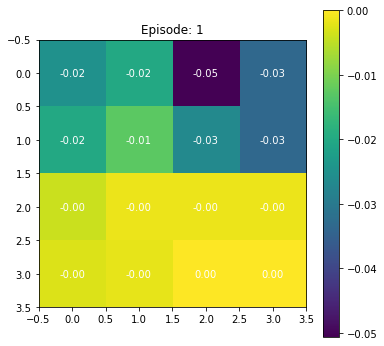

501 번째 에피소드의 이동 횟수 : 24
501 번째 에피소드의 리턴값 : -24.0


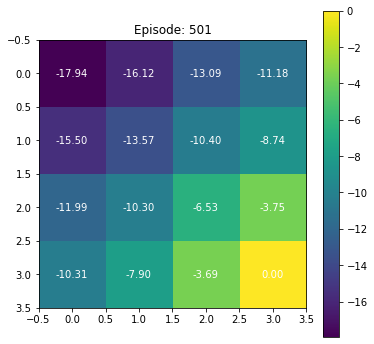

1001 번째 에피소드의 이동 횟수 : 62
1001 번째 에피소드의 리턴값 : -62.0


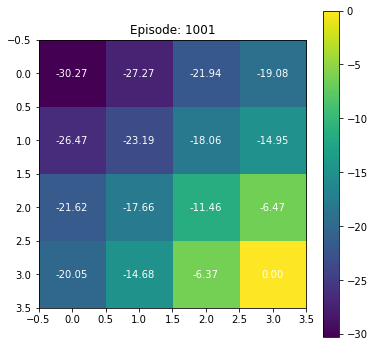

1501 번째 에피소드의 이동 횟수 : 12
1501 번째 에피소드의 리턴값 : -12.0


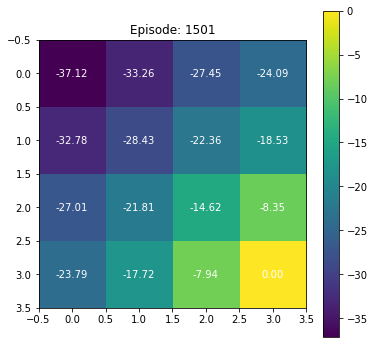

2001 번째 에피소드의 이동 횟수 : 78
2001 번째 에피소드의 리턴값 : -78.0


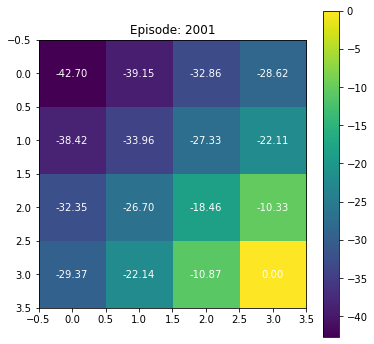

2501 번째 에피소드의 이동 횟수 : 20
2501 번째 에피소드의 리턴값 : -20.0


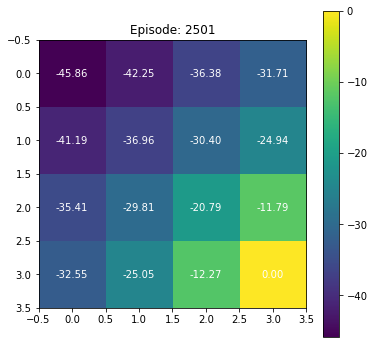

3001 번째 에피소드의 이동 횟수 : 109
3001 번째 에피소드의 리턴값 : -109.0


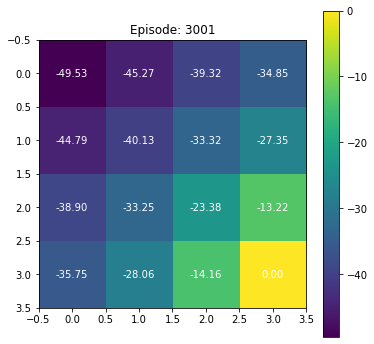

3501 번째 에피소드의 이동 횟수 : 52
3501 번째 에피소드의 리턴값 : -52.0


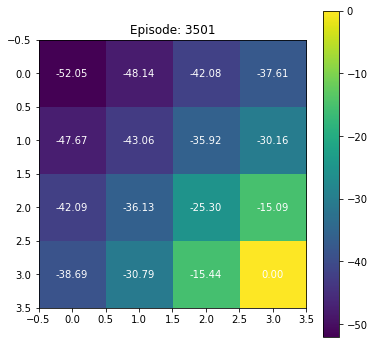

4001 번째 에피소드의 이동 횟수 : 96
4001 번째 에피소드의 리턴값 : -96.0


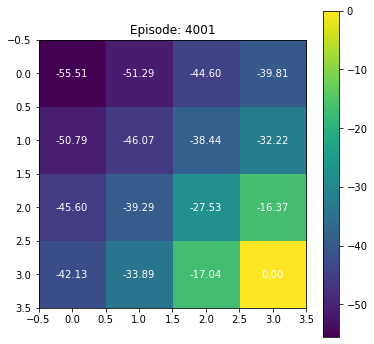

4501 번째 에피소드의 이동 횟수 : 140
4501 번째 에피소드의 리턴값 : -140.0


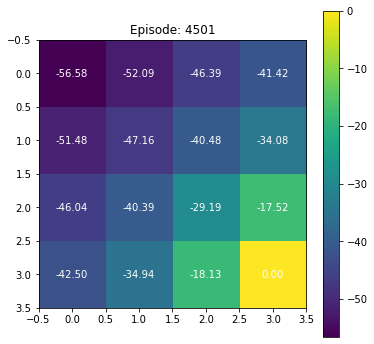

Running Time[monte_carlo]: 1.09736967 sec


In [126]:
episode = 5000 # 총 5000번의 에피소드 진행
MC_result = monte_carlo(episode)

[-55.42496965002638, -52.73060214969963, -47.23883511312737, -43.66817474435302]
[-52.1991057007804, -48.28105325862612, -41.466156585881286, -35.878477349193304]
[-45.854903030663266, -40.43995012438546, -30.697258995062786, -19.380674142115144]
[-42.537760681760915, -34.66567534638546, -18.285507068850716, 0.0]


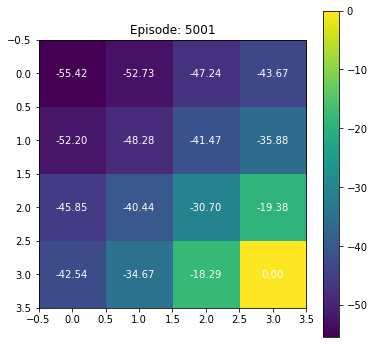

In [124]:
# 학습이 끝나고 난 후 데이터를 출력해보기 위한 코드
for row in MC_result:
    print(row)

# Value 시각화
value_visualize(episode, MC_result)